In [1]:
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
# 01/08/2021-31/07/2022 - #1#
data_01=pd.read_csv('ORG01-01082021-31072022.csv')

# 24/11/2017-25/01/2023 - #2#
data_02=pd.read_csv('ORG02-24112017-25012023.csv')

#
data_03=pd.read_csv('ORG03-24112017-25012023.csv')


C:\Users\thoma\AppData\Local\Temp\ipykernel_6408\233031799.py:8: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data_03=pd.read_csv('ORG03-24112017-25012023.csv')


In [3]:
"""
con= sqlite3.connect('Coursework.db')
cur=con.cursor()

carshare=pd.read_csv('CarSharing.csv')
carshare.to_sql('CarSharing', con, if_exists='append', index = False) ##adding data into the new table called 'CarSharing'"""

"\ncon= sqlite3.connect('Coursework.db')\ncur=con.cursor()\n\ncarshare=pd.read_csv('CarSharing.csv')\ncarshare.to_sql('CarSharing', con, if_exists='append', index = False) ##adding data into the new table called 'CarSharing'"

In [61]:
data_01.columns
#data_02.columns
#data_03.columns

Index(['EventName', 'StartDate', 'EventType', 'BookingReference',
       'AttendeeReference', 'GroupSize', 'IsLeadAttendee', 'AttendeeGrossCost',
       'EventId', 'BookingStatus', 'AttendeeType', 'TicketType',
       'StatusCreatedDate', 'ClientId'],
      dtype='object')

In [5]:
data_01['AttendeeGrossCost'].sum()

257942.5

## First dataset

In [6]:
data_01.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021 15:00,Seminar,B953419,A1021430,1,True,0.0,24077,Attending,Attendee,Standard,05/03/2021 16:27,219
1,Queer Homemaking I,22/10/2021 15:00,Reading Group,B954541,A1022562,1,True,0.0,24071,Attending,Attendee,Standard,08/03/2021 17:02,219
2,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021 15:00,Seminar,B956238,A1024268,1,True,0.0,24077,Attending,Attendee,Standard,10/03/2021 16:44,219
3,Queer Homemaking I,22/10/2021 15:00,Reading Group,B959604,A1027663,1,True,0.0,24071,Attending,Attendee,Standard,16/03/2021 17:33,219
4,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021 15:00,Seminar,B959608,A1027667,1,True,0.0,24077,Attending,Attendee,Standard,16/03/2021 17:35,219


In [7]:
data_01.info()

# there exists the Null data within the specifc column(s);


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83235 entries, 0 to 83234
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventName          83235 non-null  object 
 1   StartDate          83235 non-null  object 
 2   EventType          81613 non-null  object 
 3   BookingReference   83235 non-null  object 
 4   AttendeeReference  83235 non-null  object 
 5   GroupSize          83235 non-null  int64  
 6   IsLeadAttendee     83235 non-null  bool   
 7   AttendeeGrossCost  83235 non-null  float64
 8   EventId            83235 non-null  int64  
 9   BookingStatus      83235 non-null  object 
 10  AttendeeType       83235 non-null  object 
 11  TicketType         83235 non-null  object 
 12  StatusCreatedDate  83235 non-null  object 
 13  ClientId           83235 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(9)
memory usage: 8.3+ MB


In [8]:
data_01.isnull().sum()

EventName               0
StartDate               0
EventType            1622
BookingReference        0
AttendeeReference       0
GroupSize               0
IsLeadAttendee          0
AttendeeGrossCost       0
EventId                 0
BookingStatus           0
AttendeeType            0
TicketType              0
StatusCreatedDate       0
ClientId                0
dtype: int64

In [9]:
data_01[data_01.isnull().any(axis=1)]

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
8,Financial Technology - Challenges for the Law ...,03/09/2021 09:30,NaN,B977104,A1045245,1,True,0.0,24371,Attending,Attendee,Standard,02/05/2021 07:49,219
9,Financial Technology - Challenges for the Law ...,03/09/2021 09:30,NaN,B977116,A1045257,1,True,0.0,24371,Attending,Attendee,Standard,02/05/2021 10:24,219
10,Financial Technology - Challenges for the Law ...,03/09/2021 09:30,NaN,B978260,A1046402,1,True,0.0,24371,Attending,Attendee,Standard,05/05/2021 10:01,219
11,Financial Technology - Challenges for the Law ...,03/09/2021 09:30,NaN,B979572,A1047716,1,True,0.0,24371,Attending,Attendee,Standard,08/05/2021 13:49,219
30,Financial Technology - Challenges for the Law ...,03/09/2021 09:30,NaN,B986323,A1054512,1,True,0.0,24371,Attending,Attendee,Standard,25/05/2021 18:42,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83051,IALS Law and Language Conference: Legislative ...,06/07/2022 09:00,NaN,B1105592,A1177982,1,True,0.0,25858,Attending,Attendee,Standard,05/07/2022 16:17,219
83065,IALS Law and Language Conference: Legislative ...,06/07/2022 09:00,NaN,B1105629,A1178025,1,True,0.0,25858,Attending,Attendee,Standard,05/07/2022 23:17,219
83077,IALS Fellow's Seminar: Regulatory and Supervis...,29/07/2022 13:00,NaN,B1105685,A1178084,1,True,0.0,25289,Attending,Attendee,Standard,06/07/2022 14:00,219
83107,IALS Fellow's Seminar: Regulatory and Supervis...,29/07/2022 13:00,NaN,B1105737,A1178138,1,True,0.0,25289,Attending,Attendee,Standard,07/07/2022 06:53,219


In [59]:
data_01['BookingStatus'].unique()

array(['Attending', 'Cancelled'], dtype=object)

In [60]:
data_01['EventName'].nunique()

1350

In [47]:
data_01.groupby('EventType')[['EventName']].count()

,EventName
EventType,
Colloquium,923
Conference / Symposium,5597
Exhibition,25
Lecture,7132
Lunchtime Lecture,204
Other Events,5819
Reading Group,128
Research Training,9792
Seminar,48709


In [ ]:
data_01

In [52]:
data_forGraph = data_01.groupby('EventType')['GroupSize'].sum()
data_forGraph

,AttendeeGrossCost,GroupSize
EventType,,
Colloquium,195.0,923
Conference / Symposium,12393.0,5598
Exhibition,0.0,25
Lecture,745.0,7136
Lunchtime Lecture,0.0,204
Other Events,940.0,5819
Reading Group,0.0,128
Research Training,17055.0,9748
Seminar,170.0,48708


<Figure size 432x288 with 0 Axes>

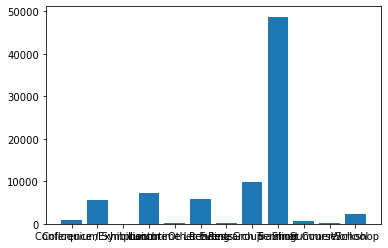

<Figure size 432x288 with 0 Axes>

In [57]:
plt.bar(data_forGraph.index, data_forGraph.GroupSize)
plt.figure()

## Second Dataset

In [12]:
data_02['EventName'].nunique()

12

In [13]:
data_02['EventName'].unique()

array(['University of London International Programmes 2018 Graduation Ceremony ',
       'University of London 2019 Graduation Ceremony ',
       'UG Laws - One to Ones Toronto', 'Open sessions in Malaysia',
       'Making Sense of Financial Decision Making',
       'University of London 2020 Graduation Ceremony ',
       'University of London 2021 Graduation Ceremony (14:30)',
       'University of London 2021 Graduation Ceremony (17:00)',
       'University of London 2021 Graduation Ceremony (ULIP)',
       'University of London 2022 Graduation Ceremony',
       'Graduation 2022 - Procession and Academics',
       'Graduation 2022 - Waiting List'], dtype=object)

In [14]:
data_02.info()

#there exists the Null data within the specifc column(s);

## EventType - all null data (19448)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19448 entries, 0 to 19447
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventName          19448 non-null  object 
 1   StartDate          19448 non-null  object 
 2   EventType          0 non-null      float64
 3   BookingReference   19448 non-null  object 
 4   AttendeeReference  19448 non-null  object 
 5   GroupSize          19448 non-null  int64  
 6   IsLeadAttendee     19448 non-null  bool   
 7   AttendeeGrossCost  19448 non-null  int64  
 8   EventId            19448 non-null  int64  
 9   BookingStatus      19448 non-null  object 
 10  AttendeeType       19448 non-null  object 
 11  TicketType         19448 non-null  object 
 12  StatusCreatedDate  19448 non-null  object 
 13  ClientId           19448 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(8)
memory usage: 1.9+ MB


In [15]:
data_02.isnull().sum()

EventName                0
StartDate                0
EventType            19448
BookingReference         0
AttendeeReference        0
GroupSize                0
IsLeadAttendee           0
AttendeeGrossCost        0
EventId                  0
BookingStatus            0
AttendeeType             0
TicketType               0
StatusCreatedDate        0
ClientId                 0
dtype: int64

In [16]:
data_02['GroupSize'].unique()

array([ 2,  3,  1,  5,  8,  0,  4,  6,  7,  9, 15, 10, 13, 11],
      dtype=int64)

In [17]:
data_02[data_02.isnull().any(axis=1)]

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,University of London International Programmes ...,06/03/2018 00:00,NaN,B452158,A502856,2,True,27,12445,Attending,Graduand,PM Ceremony,26/10/2017 10:12,249
1,University of London International Programmes ...,06/03/2018 00:00,NaN,B452158,A502857,2,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:12,249
2,University of London International Programmes ...,06/03/2018 00:00,NaN,B452162,A502861,3,True,0,12445,Attending,Graduand,PM Ceremony,26/10/2017 10:16,249
3,University of London International Programmes ...,06/03/2018 00:00,NaN,B452162,A502862,3,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:16,249
4,University of London International Programmes ...,06/03/2018 00:00,NaN,B452162,A502863,3,False,50,12445,Attending,Guest,Guest PM Ceremony,26/10/2017 10:16,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19443,University of London 2022 Graduation Ceremony,13/07/2022 00:00,NaN,B1075279,A1178687,5,False,25,25956,Attending,Guest,Guest 15th Ceremony,14/07/2022 13:49,249
19444,University of London 2022 Graduation Ceremony,13/07/2022 00:00,NaN,B1071435,A1178755,4,False,25,25956,Attending,Guest,Guest 14th Ceremony,15/07/2022 11:10,249
19445,University of London 2022 Graduation Ceremony,13/07/2022 00:00,NaN,B1071435,A1178756,4,False,25,25956,Attending,Guest,Guest 14th Ceremony,15/07/2022 11:10,249
19446,University of London 2022 Graduation Ceremony,13/07/2022 00:00,NaN,B1071435,A1178757,4,False,25,25956,Attending,Guest,Guest 14th Ceremony,15/07/2022 11:10,249


In [26]:
data_02.groupby('EventName')[['GroupSize']].sum()

,GroupSize
EventName,
Graduation 2022 - Procession and Academics,128
Graduation 2022 - Waiting List,1085
Making Sense of Financial Decision Making,2
Open sessions in Malaysia,14
UG Laws - One to Ones Toronto,32
University of London 2019 Graduation Ceremony,15556
University of London 2020 Graduation Ceremony,14128
University of London 2021 Graduation Ceremony (14:30),221
University of London 2021 Graduation Ceremony (17:00),455


## Third Dataset

In [18]:
data_03.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,Developing Reading and Writing Skills,28/11/2017 00:00,NaN,B462687,A514297,1,True,0,14983,Registered,Attendee,NaN,11/11/2017 09:15,153.0
1,Teaching Grammar: Classroom choices,13/12/2017 00:00,NaN,B462689,A514299,1,True,0,14960,Registered,Attendee,NaN,11/11/2017 09:18,153.0
2,Teaching Grammar: Classroom choices,13/12/2017 00:00,NaN,B467150,A519135,1,True,0,14960,Registered,Attendee,NaN,22/11/2017 17:02,153.0
3,Academic vocabulary: what do students need to ...,19/04/2018 00:00,NaN,B533234,A588469,1,True,0,15893,Registered,Attendee,NaN,11/04/2018 13:38,153.0
4,Researching the classroom,14/11/2018 00:00,NaN,B604614,A662691,1,True,0,17350,Registered,Attendee,NaN,15/10/2018 14:33,153.0


In [19]:
data_03.info()

# There exists the Null data within the specifc column(s);

## EventType - 245713 Null data

## TicketType - all Null data (245988)

## StatusCreateDate - 2 Null data

## ClientId - 3 Null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245988 entries, 0 to 245987
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EventName          245988 non-null  object 
 1   StartDate          245988 non-null  object 
 2   EventType          275 non-null     object 
 3   BookingReference   245988 non-null  object 
 4   AttendeeReference  245988 non-null  object 
 5   GroupSize          245988 non-null  int64  
 6   IsLeadAttendee     245988 non-null  object 
 7   AttendeeGrossCost  245988 non-null  int64  
 8   EventId            245988 non-null  int64  
 9   BookingStatus      245986 non-null  object 
 10  AttendeeType       245988 non-null  object 
 11  TicketType         0 non-null       float64
 12  StatusCreatedDate  245986 non-null  object 
 13  ClientId           245985 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 26.3+ MB


In [20]:
data_03.isnull().sum()

EventName                 0
StartDate                 0
EventType            245713
BookingReference          0
AttendeeReference         0
GroupSize                 0
IsLeadAttendee            0
AttendeeGrossCost         0
EventId                   0
BookingStatus             2
AttendeeType              0
TicketType           245988
StatusCreatedDate         2
ClientId                  3
dtype: int64

In [21]:
data_01[data_01.isnull().any(axis=1)]

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
8,Financial Technology - Challenges for the Law ...,03/09/2021 09:30,NaN,B977104,A1045245,1,True,0.0,24371,Attending,Attendee,Standard,02/05/2021 07:49,219
9,Financial Technology - Challenges for the Law ...,03/09/2021 09:30,NaN,B977116,A1045257,1,True,0.0,24371,Attending,Attendee,Standard,02/05/2021 10:24,219
10,Financial Technology - Challenges for the Law ...,03/09/2021 09:30,NaN,B978260,A1046402,1,True,0.0,24371,Attending,Attendee,Standard,05/05/2021 10:01,219
11,Financial Technology - Challenges for the Law ...,03/09/2021 09:30,NaN,B979572,A1047716,1,True,0.0,24371,Attending,Attendee,Standard,08/05/2021 13:49,219
30,Financial Technology - Challenges for the Law ...,03/09/2021 09:30,NaN,B986323,A1054512,1,True,0.0,24371,Attending,Attendee,Standard,25/05/2021 18:42,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83051,IALS Law and Language Conference: Legislative ...,06/07/2022 09:00,NaN,B1105592,A1177982,1,True,0.0,25858,Attending,Attendee,Standard,05/07/2022 16:17,219
83065,IALS Law and Language Conference: Legislative ...,06/07/2022 09:00,NaN,B1105629,A1178025,1,True,0.0,25858,Attending,Attendee,Standard,05/07/2022 23:17,219
83077,IALS Fellow's Seminar: Regulatory and Supervis...,29/07/2022 13:00,NaN,B1105685,A1178084,1,True,0.0,25289,Attending,Attendee,Standard,06/07/2022 14:00,219
83107,IALS Fellow's Seminar: Regulatory and Supervis...,29/07/2022 13:00,NaN,B1105737,A1178138,1,True,0.0,25289,Attending,Attendee,Standard,07/07/2022 06:53,219


In [22]:
data_01.describe()

,GroupSize,AttendeeGrossCost,EventId,ClientId
count,83235.000000,83235.000000,83235.000000,83235.0
mean,0.998931,3.098967,25353.523181,219.0
std,0.035502,34.838371,538.107062,0.0
min,0.000000,0.000000,22520.000000,219.0
25%,1.000000,0.000000,24912.000000,219.0
50%,1.000000,0.000000,25330.000000,219.0
75%,1.000000,0.000000,25802.000000,219.0
max,2.000000,680.000000,26433.000000,219.0
